# Train Restricted Boltzmann Machine (RBM)

In [7]:
import joblib
import numpy as np
import sys
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import random
from rdkit.Chem import AllChem, Draw
from rdkit import Chem

sys.path.append("../lib/")
from MoleculeRegressor import FP
from rbm_util import train_rbm


In [8]:
#load database
file_path="../database/BradleyDoublePlusGoodMeltingPointDataset_logP.csv"
target_param_name="MolLogP"
smiles_column="SMILES"
    
df=pd.read_csv(file_path)
df=df[[smiles_column,target_param_name]]
df=df.dropna()

#calculate fingerprint and delete broken smiles
_,available_index=FP.calc_fingerprint(df[smiles_column].values)
df=df[available_index]

fp_list,_=FP.calc_fingerprint(df[smiles_column].values)

In [9]:
sampling_numbers = 4

#wrapper function to train RBM

def auto_learn(sampling_numbers, plot=True,
               all_dim=1024,
               k=1,
               epochs=300,
               batch_size=None):
    
    # randomly select fingerprints (n = sampling_numbers)
    dump_fp_list = random.sample(fp_list, sampling_numbers)
    joblib.dump(dump_fp_list, "data/fp.bin")

    if batch_size is None:
        batch_size = int(len(dump_fp_list)/2)
    if batch_size >= 32:
        batch_size = 32
    print(batch_size)

    fp_dim = len(fp_list[0])

    while all_dim <= fp_dim:
        all_dim = all_dim*2

    print("RBM dimension:", all_dim)
    rc_list = train_rbm(fp_path="data/fp.bin",
                        out_path="data/rbm_J.bin",
                        batch_size=batch_size,
                        all_units=all_dim,
                        use_gpu=True,
                        epochs=epochs,
                        check_reconstruction=10,
                        k=k,
                        plot=plot)

    err_list = []
    for i in range(len(rc_list)):
        res = rc_list[i]
        err = np.mean((res[0]-res[1])**2)
        err_list.append(err)

    #return reconstruction error
    return np.log(np.mean(err_list))

1
RBM dimension: 2048
RBM fitting: 32it [00:00, 70.23it/s]
Epoch:1 ,avg_cost = 0.12389445304870605 ,std_cost = 0.0760997086763382 ,avg_grad = 77248.21875 ,std_grad = 38103.15625
RBM fitting: 32it [00:00, 847.37it/s]
Epoch:2 ,avg_cost = 0.09247005730867386 ,std_cost = 0.05898900330066681 ,avg_grad = 62885.79296875 ,std_grad = 25470.181640625
RBM fitting: 32it [00:00, 847.84it/s]
Epoch:3 ,avg_cost = 0.08151543885469437 ,std_cost = 0.04710909724235535 ,avg_grad = 63110.95703125 ,std_grad = 28205.4765625
RBM fitting: 32it [00:00, 689.57it/s]
Epoch:4 ,avg_cost = 0.07735969126224518 ,std_cost = 0.04439222812652588 ,avg_grad = 60322.91796875 ,std_grad = 28644.041015625
RBM fitting: 32it [00:00, 843.56it/s]
Epoch:5 ,avg_cost = 0.07501760870218277 ,std_cost = 0.04226740449666977 ,avg_grad = 61227.4765625 ,std_grad = 27259.533203125
RBM fitting: 32it [00:00, 839.88it/s]
Epoch:6 ,avg_cost = 0.0745658278465271 ,std_cost = 0.04238948971033096 ,avg_grad = 59237.203125 ,std_grad = 27903.71875
RBM fit

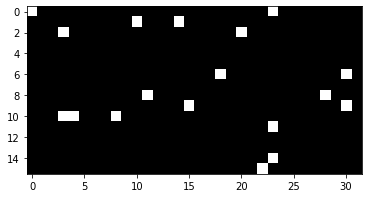

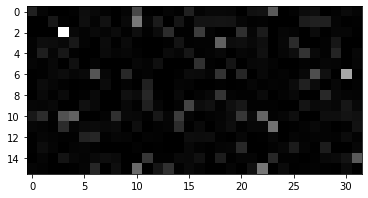

Original and reconstructed images


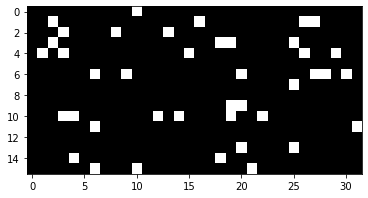

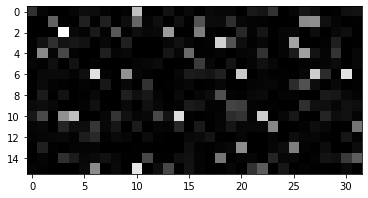

Original and reconstructed images


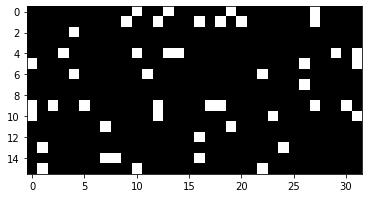

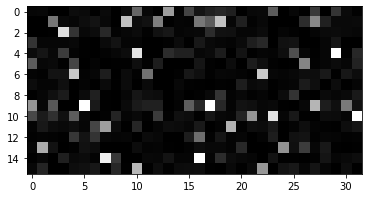

Original and reconstructed images


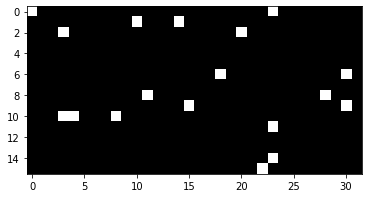

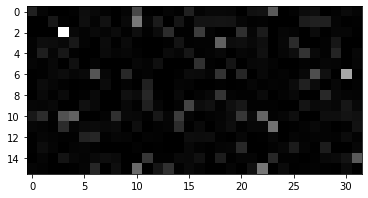

Original and reconstructed images


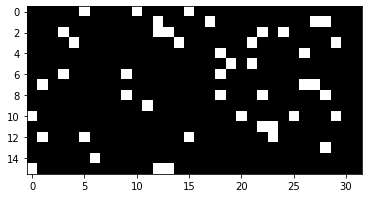

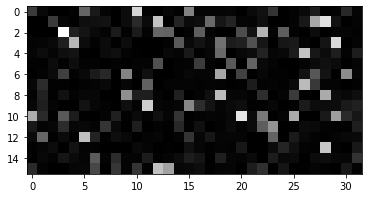

Original and reconstructed images


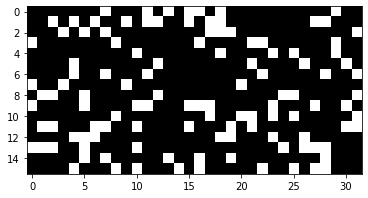

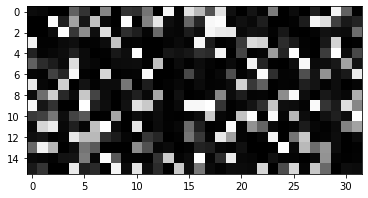

Original and reconstructed images


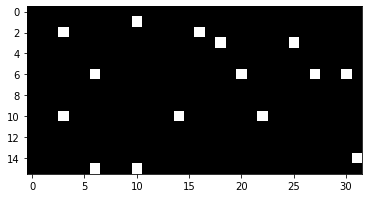

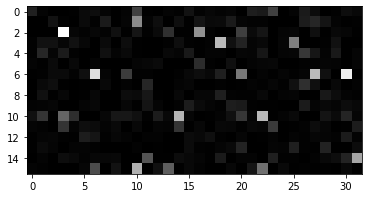

Original and reconstructed images


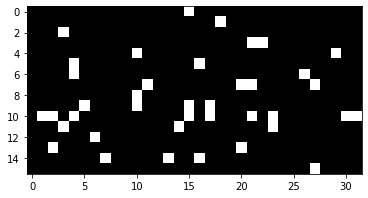

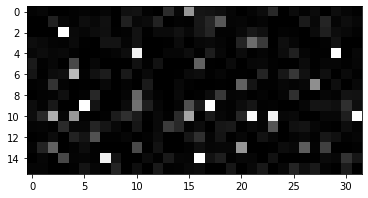

Original and reconstructed images


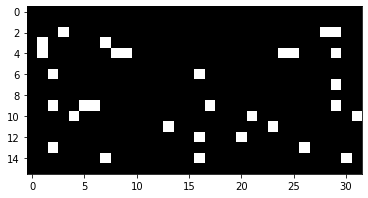

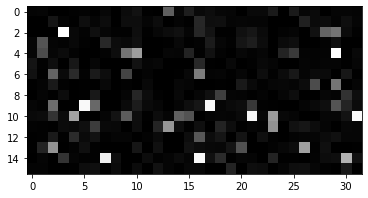

Original and reconstructed images


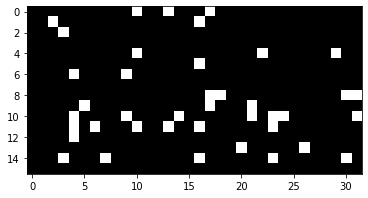

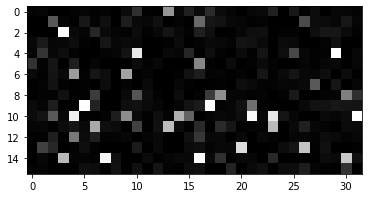

-3.6446638

In [10]:
auto_learn(32,plot=True,all_dim=2048,k=3,epochs=300,batch_size=1)
